<a href="https://colab.research.google.com/github/PrimWong/light_optics_grating_experiment/blob/main/AxesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Axes Detection

This code gives a best estimate of the x and y axis (horizontal and vertical axes) for the plot/chart.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%pylab inline
import cv2, imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
from matplotlib import rcParams

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [23]:
# Directory of images to run the code on
img_dir = '/content/drive/MyDrive/Physic_data/processed_image'

# Directory to save the output images
save_dir = '/content/drive/MyDrive/Physic_data/out'

### Method to detect x and y axis

In [24]:
def findMaxConsecutiveOnes(nums) -> int:
    count = maxCount = 0

    for i in range(len(nums)):
        if nums[i] == 1:
            count += 1
        else:
            maxCount = max(count, maxCount)
            count = 0

    return max(count, maxCount)

In [25]:
def detectAxes(filepath, threshold=None, debug=False):
    if filepath is None:
        return None, None

    if threshold is None:
        threshold = 10

    image = cv2.imread(filepath)
    height, width, channels = image.shape

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the max-consecutive-ones for eah column in the bw image, and...
    # pick the "first" index that fall in [max - threshold, max + threshold]
    maxConsecutiveOnes = [findMaxConsecutiveOnes(gray[:, idx] < 200) for idx in range(width)]
    start_idx, maxindex, maxcount = 0, 0, max(maxConsecutiveOnes)
    while start_idx < width:
        if abs(maxConsecutiveOnes[start_idx] - maxcount) <= threshold:
            maxindex = start_idx
            break

        start_idx += 1

    yaxis = (maxindex, 0, maxindex, height)

    if debug:
        fig, ax = plt.subplots(1, 2)

        ax[0].imshow(image)

        ax[1].plot(maxConsecutiveOnes, color = 'k')
        ax[1].axhline(y = max(maxConsecutiveOnes) - 10, color = 'r', linestyle = 'dashed')
        ax[1].axhline(y = max(maxConsecutiveOnes) + 10, color = 'r', linestyle = 'dashed')
        ax[1].vlines(x = maxindex, ymin = 0.0, ymax = maxConsecutiveOnes[maxindex], color = 'b', linewidth = 4)

        plt.show()

    # Get the max-consecutive-ones for eah row in the bw image, and...
    # pick the "last" index that fall in [max - threshold, max + threshold]
    maxConsecutiveOnes = [findMaxConsecutiveOnes(gray[idx, :] < 200) for idx in range(height)]
    start_idx, maxindex, maxcount = 0, 0, max(maxConsecutiveOnes)
    while start_idx < height:
        if abs(maxConsecutiveOnes[start_idx] - maxcount) <= threshold:
            maxindex = start_idx

        start_idx += 1

    cv2.line(image, (0, maxindex), (width, maxindex),  (255, 0, 0), 2)
    xaxis = (0, maxindex, width, maxindex)

    if debug:
        rcParams['figure.figsize'] = 15, 8

        fig, ax = plt.subplots(1, 1)
        ax.imshow(image, aspect = 'auto')

    return xaxis, yaxis

In [26]:
for path in Path(img_dir).iterdir():
    filepath = img_dir + "/" + path.name
    image = cv2.imread(filepath)
    xaxis, yaxis = detectAxes(filepath)

    for (x1, y1, x2, y2) in [xaxis]:
        cv2.line(image, (x1, y1), (x2, y2),  (0, 0, 255), 2)

    for (x1, y1, x2, y2) in [yaxis]:
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    cv2.imwrite(save_dir + '/' + ''.join(path.name.split(".")[:-1]) + "_axes.jpg", image)

FileNotFoundError: [Errno 2] No such file or directory: '6391_0_axes.png'

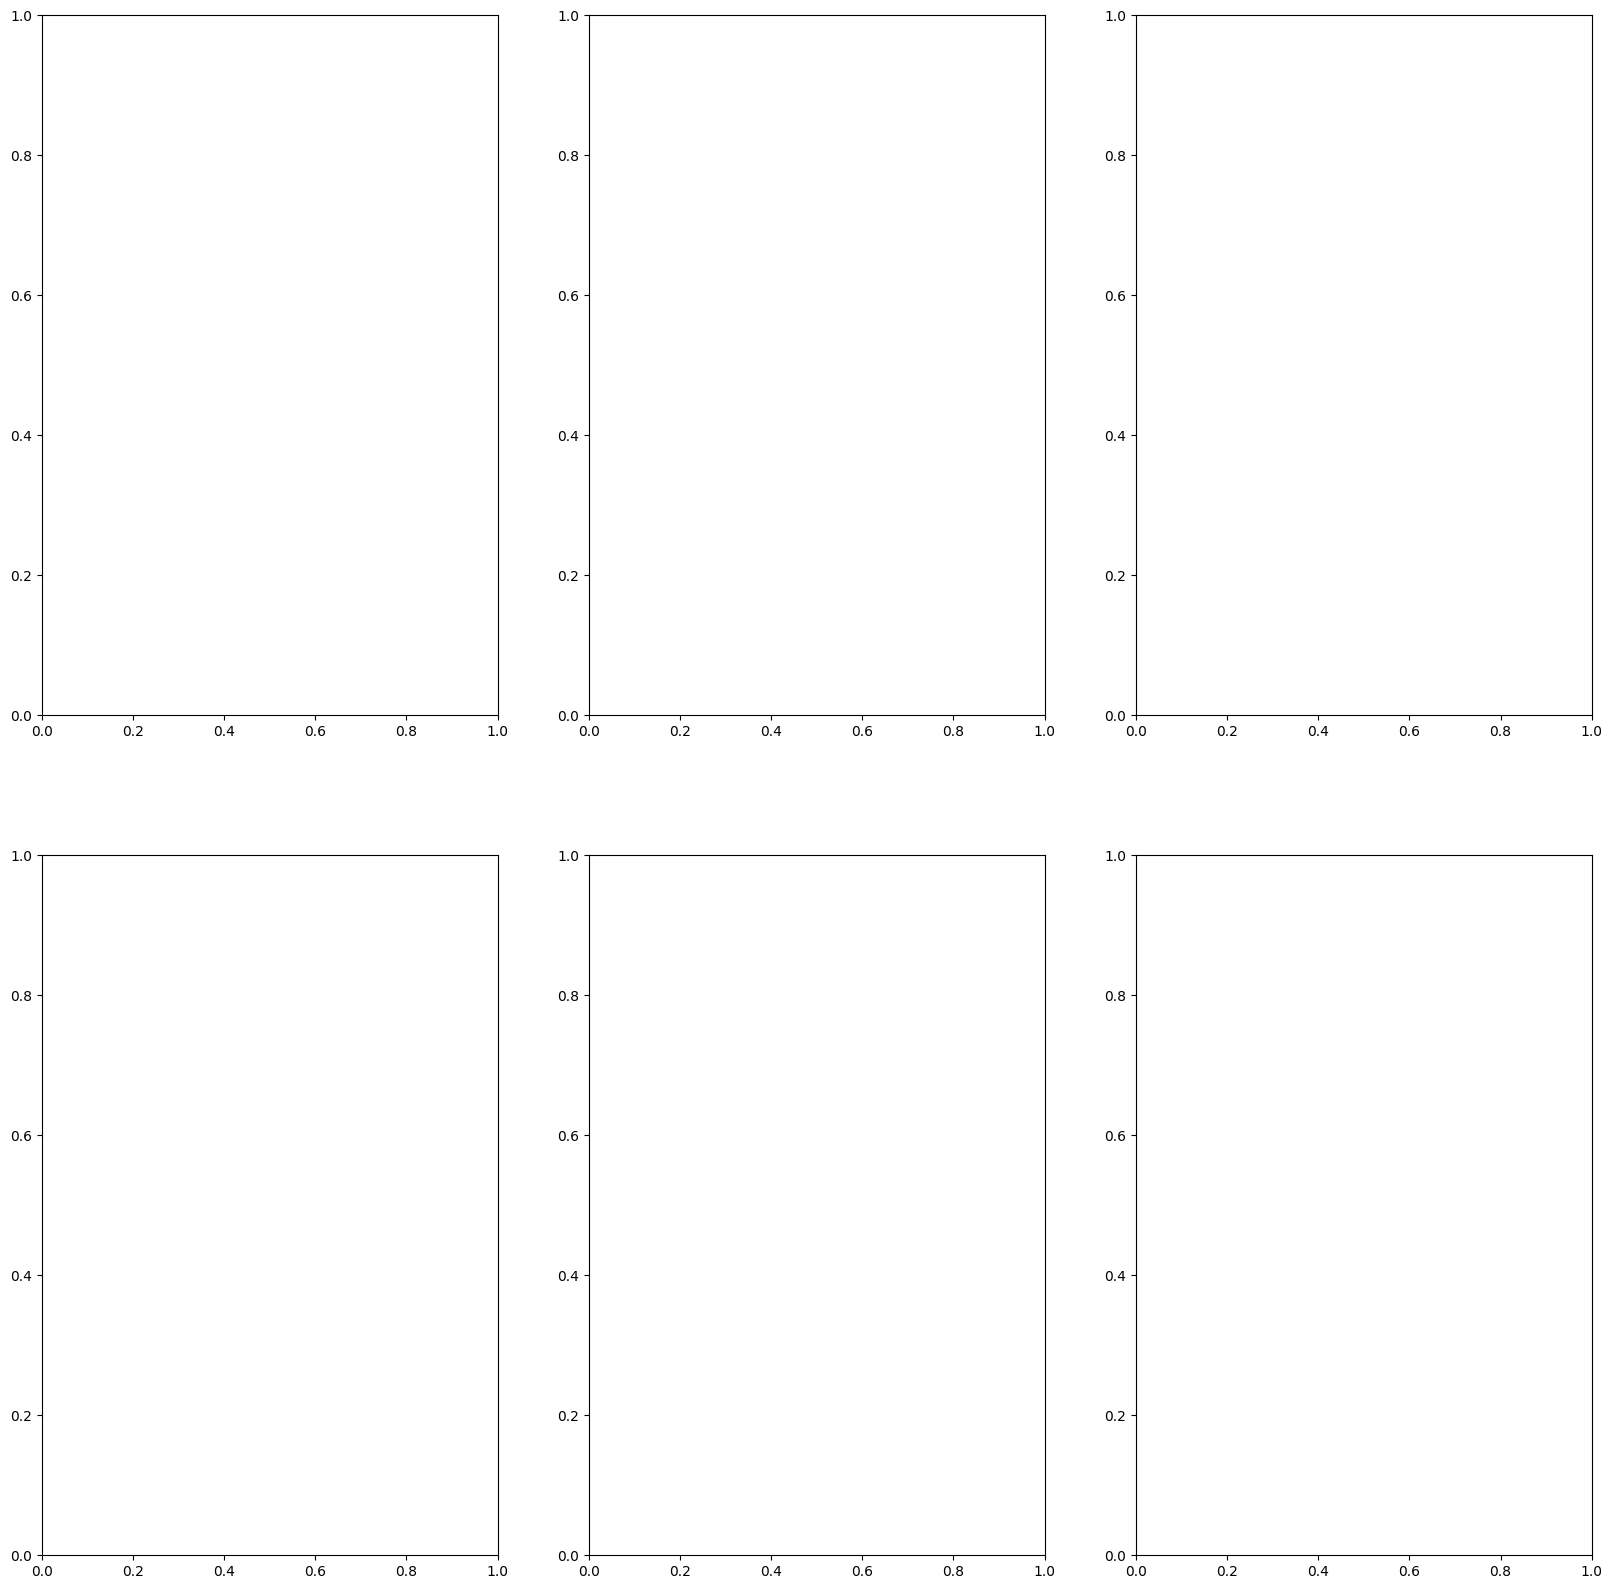

In [27]:
badplots = []

for path in Path("/content/out").iterdir():
    badplots.append(path.name)

f, ax = plt.subplots(2, 3, figsize = (20, 20))

for index in range(6):
    ax[index // 4, index % 4].imshow(mpimg.imread("" + badplots[index]))
    ax[index // 4, index % 4].axis('off')
    ax[index // 4, index % 4].set_aspect('equal')

plt.show()